<a href="https://colab.research.google.com/github/manav8826/PorterTimeEstimator_NEURAL_NETWORK/blob/main/PorterTimeEstimator_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porter: NN Regression Business Case

## Problem Statement
This repository contains a project focused on developing predictive models to estimate delivery times for Porter, India's largest intra-city logistics marketplace. Utilizing Random Forest and Neural Network regression techniques, the project analyzes various factors .

**Additional Views**
1. Geographical Analysis
Map-Based Visualization: This can help identify geographical areas where deliveries are consistently faster or slower.
2. Time of Day/Day of Week Analysis
Time Series Plots: Visualize delivery times against the time of day or day of the week to identify patterns or peak times that affect delivery speed.
3. Distance vs. Delivery Time Plot
Scatter Plot: Plot the distance between the warehouse and delivery location against the delivery time. Look for trends or outliers that could indicate inefficiencies.





# Loading Dataset

In [6]:
!gdown 1NUlK_9LsbvRcebmSIaKHQbu9wICTzPYy

Downloading...
From: https://drive.google.com/uc?id=1NUlK_9LsbvRcebmSIaKHQbu9wICTzPYy
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 192MB/s]


# Installing Depedencies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/dataset.csv')

df.head(10)

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   
5        3.0  2015-01-28 20:30:38  2015-01-28 21:08:58   
6        3.0  2015-01-31 02:16:36  2015-01-31 02:43:00   
7        3.0  2015-02-12 03:03:35  2015-02-12 03:36:20   
8        2.0  2015-02-16 00:11:35  2015-02-16 00:38:01   
9        3.0  2015-02-18 01:15:45  2015-02-18 02:08:57   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
5  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
6  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
7  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
8  f0ade77b43923b38237db569b016ba25                 indian             3.0   
9  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   
5            3      5000                   3            1500            1900   
6            2      3900                   2            1200            2700   
7            4      4850                   4             750            1800   
8            4      4771                   3             820            1604   
9            2      2100                   2             700            1200   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0  
5                     2.0                  2.0                       2.0  
6                    10.0                  9.0                       9.0  
7                     7.0                  8.0                       7.0  
8                     8.0                  6.0                      18.0  
9                     2.0                  2.0                       2.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [10]:
df.shape

(197428, 14)

# Data Preprocessing & Feature Engineering

In [11]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [12]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(176248, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  float64       
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  float64       
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

In [17]:
df.head(5)

market_id          created_at actual_delivery_time  \
0         1.0 2015-02-06 22:24:17  2015-02-06 23:27:16   
1         2.0 2015-02-10 21:49:25  2015-02-10 22:56:29   
8         2.0 2015-02-16 00:11:35  2015-02-16 00:38:01   
14        1.0 2015-02-12 03:36:46  2015-02-12 04:14:39   
15        1.0 2015-01-27 02:12:36  2015-01-27 03:02:24   

                            store_id store_primary_category  order_protocol  \
0   df263d996281d984952c07998dc54358               american             1.0   
1   f0ade77b43923b38237db569b016ba25                mexican             2.0   
8   f0ade77b43923b38237db569b016ba25                 indian             3.0   
14  ef1e491a766ce3127556063d49bc2f98                italian             1.0   
15  ef1e491a766ce3127556063d49bc2f98                italian             1.0   

    total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                     33.0                 14.0                      21.0  
1                      1.0                  2.0                       2.0  
8                      8.0                  6.0                      18.0  
14                     5.0                  6.0                       8.0  
15                     5.0                  5.0                       7.0

# Encoding Categorical Variable

In [18]:
df["order_protocol"] = df.order_protocol.astype("category").cat.codes
df["store_primary_category"] = df.store_primary_category.astype("category").cat.codes
df["market_id"] = df.market_id.astype("category").cat.codes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  int8          
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  int8          
 5   order_protocol            176248 non-null  int8          
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

# Creating Target Feature

In [20]:
df["time_taken_mins"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

In [21]:
df.head(5)

market_id          created_at actual_delivery_time  \
0           0 2015-02-06 22:24:17  2015-02-06 23:27:16   
1           1 2015-02-10 21:49:25  2015-02-10 22:56:29   
8           1 2015-02-16 00:11:35  2015-02-16 00:38:01   
14          0 2015-02-12 03:36:46  2015-02-12 04:14:39   
15          0 2015-01-27 02:12:36  2015-01-27 03:02:24   

                            store_id  store_primary_category  order_protocol  \
0   df263d996281d984952c07998dc54358                       4               0   
1   f0ade77b43923b38237db569b016ba25                      46               1   
8   f0ade77b43923b38237db569b016ba25                      36               2   
14  ef1e491a766ce3127556063d49bc2f98                      38               0   
15  ef1e491a766ce3127556063d49bc2f98                      38               0   

    total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_partners  total_busy_partners  total_outstanding_orders  \
0                     33.0                 14.0                      21.0   
1                      1.0                  2.0                       2.0   
8                      8.0                  6.0                      18.0   
14                     5.0                  6.0                       8.0   
15                     5.0                  5.0                       7.0   

    time_taken_mins  
0         62.983333  
1         67.066667  
8         26.433333  
14        37.883333  
15        49.800000

# Statistical Analysis

In [22]:
order_volumes = df.groupby('market_id').size()
print("Distribution of Order Volumes Across Different Markets:")
print(order_volumes)

Distribution of Order Volumes Across Different Markets:
market_id
0    37207
1    53625
2    21119
3    46359
4    17298
5      640
dtype: int64


In [23]:
df['order_hour'] = df['created_at'].dt.hour

order_frequency = df['order_hour'].value_counts().sort_index()

peak_hours = order_frequency.idxmax()
peak_order_count = order_frequency.max()
print(order_frequency)
print(f"The peak hours for order placements are between {peak_hours} and {peak_hours + 1} o'clock, with {peak_order_count} orders.")

order_hour
0     11466
1     25734
2     32940
3     23719
4     13254
5      6079
6      1223
7         9
8         2
14       39
15      504
16     1945
17     3071
18     4546
19    12214
20    14014
21    10274
22     7877
23     7338
Name: count, dtype: int64
The peak hours for order placements are between 2 and 3 o'clock, with 32940 orders.


In [24]:
df['order_day_of_week'] = df['created_at'].dt.dayofweek

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['order_day_name'] = df['order_day_of_week'].map(day_names)

order_volumes_by_day = df['order_day_name'].value_counts()
peak_days = order_volumes_by_day.idxmax()
peak_order_count = order_volumes_by_day.max()
print(order_volumes_by_day)
print(f"The day(s) with the highest order volumes is/are {peak_days}, with {peak_order_count} orders.")

order_day_name
Saturday     30858
Sunday       29898
Friday       25012
Monday       24202
Thursday     22997
Wednesday    21796
Tuesday      21485
Name: count, dtype: int64
The day(s) with the highest order volumes is/are Saturday, with 30858 orders.


In [25]:
df.head(5)

market_id          created_at actual_delivery_time  \
0           0 2015-02-06 22:24:17  2015-02-06 23:27:16   
1           1 2015-02-10 21:49:25  2015-02-10 22:56:29   
8           1 2015-02-16 00:11:35  2015-02-16 00:38:01   
14          0 2015-02-12 03:36:46  2015-02-12 04:14:39   
15          0 2015-01-27 02:12:36  2015-01-27 03:02:24   

                            store_id  store_primary_category  order_protocol  \
0   df263d996281d984952c07998dc54358                       4               0   
1   f0ade77b43923b38237db569b016ba25                      46               1   
8   f0ade77b43923b38237db569b016ba25                      36               2   
14  ef1e491a766ce3127556063d49bc2f98                      38               0   
15  ef1e491a766ce3127556063d49bc2f98                      38               0   

    total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_partners  total_busy_partners  total_outstanding_orders  \
0                     33.0                 14.0                      21.0   
1                      1.0                  2.0                       2.0   
8                      8.0                  6.0                      18.0   
14                     5.0                  6.0                       8.0   
15                     5.0                  5.0                       7.0   

    time_taken_mins  order_hour  order_day_of_week order_day_name  
0         62.983333          22                  4         Friday  
1         67.066667          21                  1        Tuesday  
8         26.433333           0                  0         Monday  
14        37.883333           3                  3       Thursday  
15        49.800000           2                  1        Tuesday

In [26]:
df.describe().transpose()

count                           mean  \
market_id                 176248.0                       1.743747   
created_at                  176248  2015-02-04 19:35:43.333773824   
actual_delivery_time        176248  2015-02-04 20:23:29.186373632   
store_primary_category    176248.0                      35.891482   
order_protocol            176248.0                       1.911687   
total_items               176248.0                       3.204592   
subtotal                  176248.0                    2696.498939   
num_distinct_items        176248.0                       2.674589   
min_item_price            176248.0                      684.93773   
max_item_price            176248.0                    1159.886994   
total_onshift_partners    176248.0                      44.905276   
total_busy_partners       176248.0                      41.845434   
total_outstanding_orders  176248.0                        58.2068   
time_taken_mins           176248.0                       47.76421   
order_hour                176248.0                       8.493872   
order_day_of_week         176248.0                       3.221563   

                                          min                         25%  \
market_id                                 0.0                         1.0   
created_at                2015-01-21 15:22:03  2015-01-29 01:37:01.500000   
actual_delivery_time      2015-01-21 16:16:34         2015-01-29 02:24:29   
store_primary_category                    0.0                        18.0   
order_protocol                            0.0                         0.0   
total_items                               1.0                         2.0   
subtotal                                  0.0                      1408.0   
num_distinct_items                        1.0                         1.0   
min_item_price                          -86.0                       299.0   
max_item_price                            0.0                       799.0   
total_onshift_partners                   -4.0                        17.0   
total_busy_partners                      -5.0                        15.0   
total_outstanding_orders                 -6.0                        17.0   
time_taken_mins                      1.683333                   35.083333   
order_hour                                0.0                         2.0   
order_day_of_week                         0.0                         1.0   

                                                 50%  \
market_id                                        1.0   
created_at                2015-02-05 02:30:12.500000   
actual_delivery_time             2015-02-05 03:31:58   
store_primary_category                          38.0   
order_protocol                                   2.0   
total_items                                      3.0   
subtotal                                      2221.0   
num_distinct_items                               2.0   
min_item_price                                 595.0   
max_item_price                                1095.0   
total_onshift_partners                          37.0   
total_busy_partners                             35.0   
total_outstanding_orders                        41.0   
time_taken_mins                            44.366667   
order_hour                                       3.0   
order_day_of_week                                3.0   

                                                    75%                  max  \
market_id                                           3.0                  5.0   
created_at                2015-02-12 00:52:58.249999872  2015-02-18 06:00:44   
actual_delivery_time                2015-02-12 01:35:34  2015-02-19 22:45:31   
store_primary_category                             55.0                 72.0   
order_protocol                                      3.0                  6.0   
total_items                                         4.0                411.0   
subtotal                        

In [27]:
df.store_primary_category.nunique()

73

In [28]:
df.order_protocol.nunique()

7

# Visual Analysis

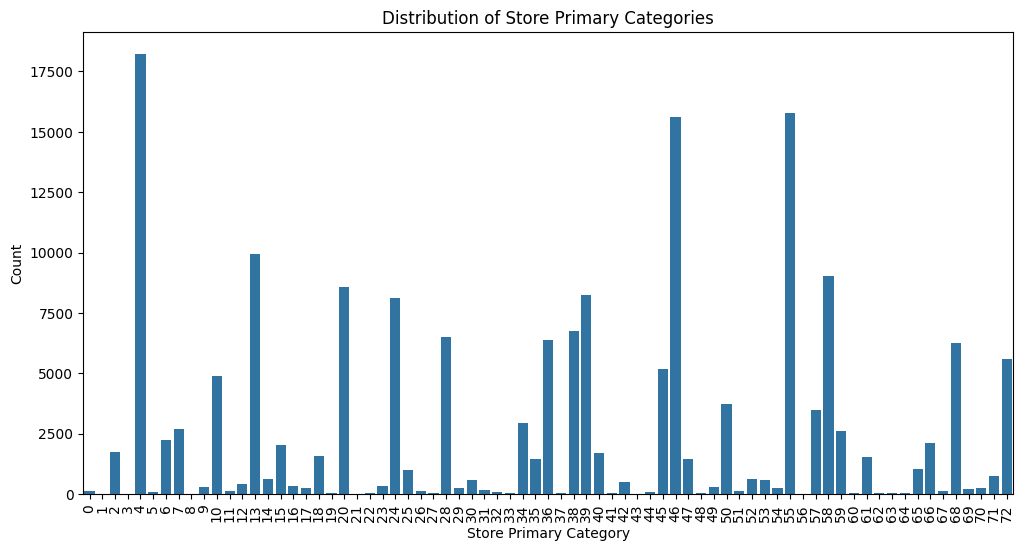

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='store_primary_category')
plt.xticks(rotation=90)
plt.xlabel('Store Primary Category')
plt.ylabel('Count')
plt.title('Distribution of Store Primary Categories')
plt.show()

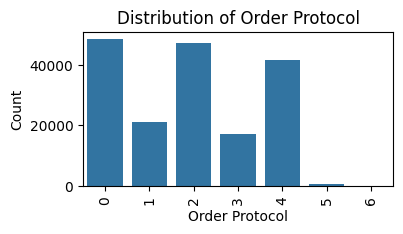

In [30]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='order_protocol')
plt.xticks(rotation=90)
plt.xlabel('Order Protocol')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

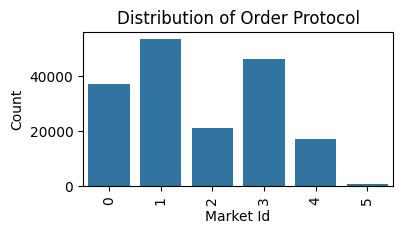

In [31]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='market_id')
plt.xticks(rotation=90)
plt.xlabel('Market Id')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

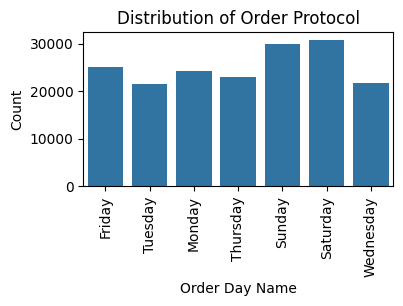

In [32]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='order_day_name')
plt.xticks(rotation=90)
plt.xlabel('Order Day Name')
plt.ylabel('Count')
plt.title('Distribution of Order Protocol')
plt.show()

# Data Cleaning

In [33]:
df.drop(['order_day_name','created_at','actual_delivery_time', 'store_id'],axis=1,inplace=True)

# Correlation Analysis

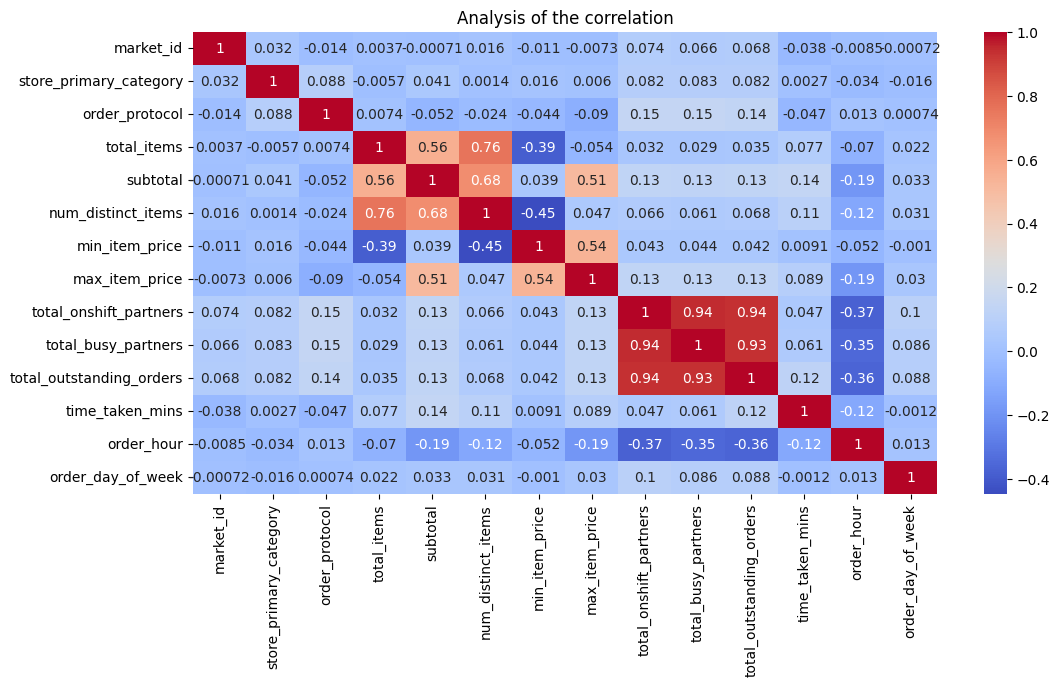

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Analysis of the correlation')
plt.show()

- total_outstanding_order, total_onshift_partners & total_busy_partners are highly correlated with each other.

# Analysis of the distribution of the various features

<Figure size 1200x600 with 0 Axes>

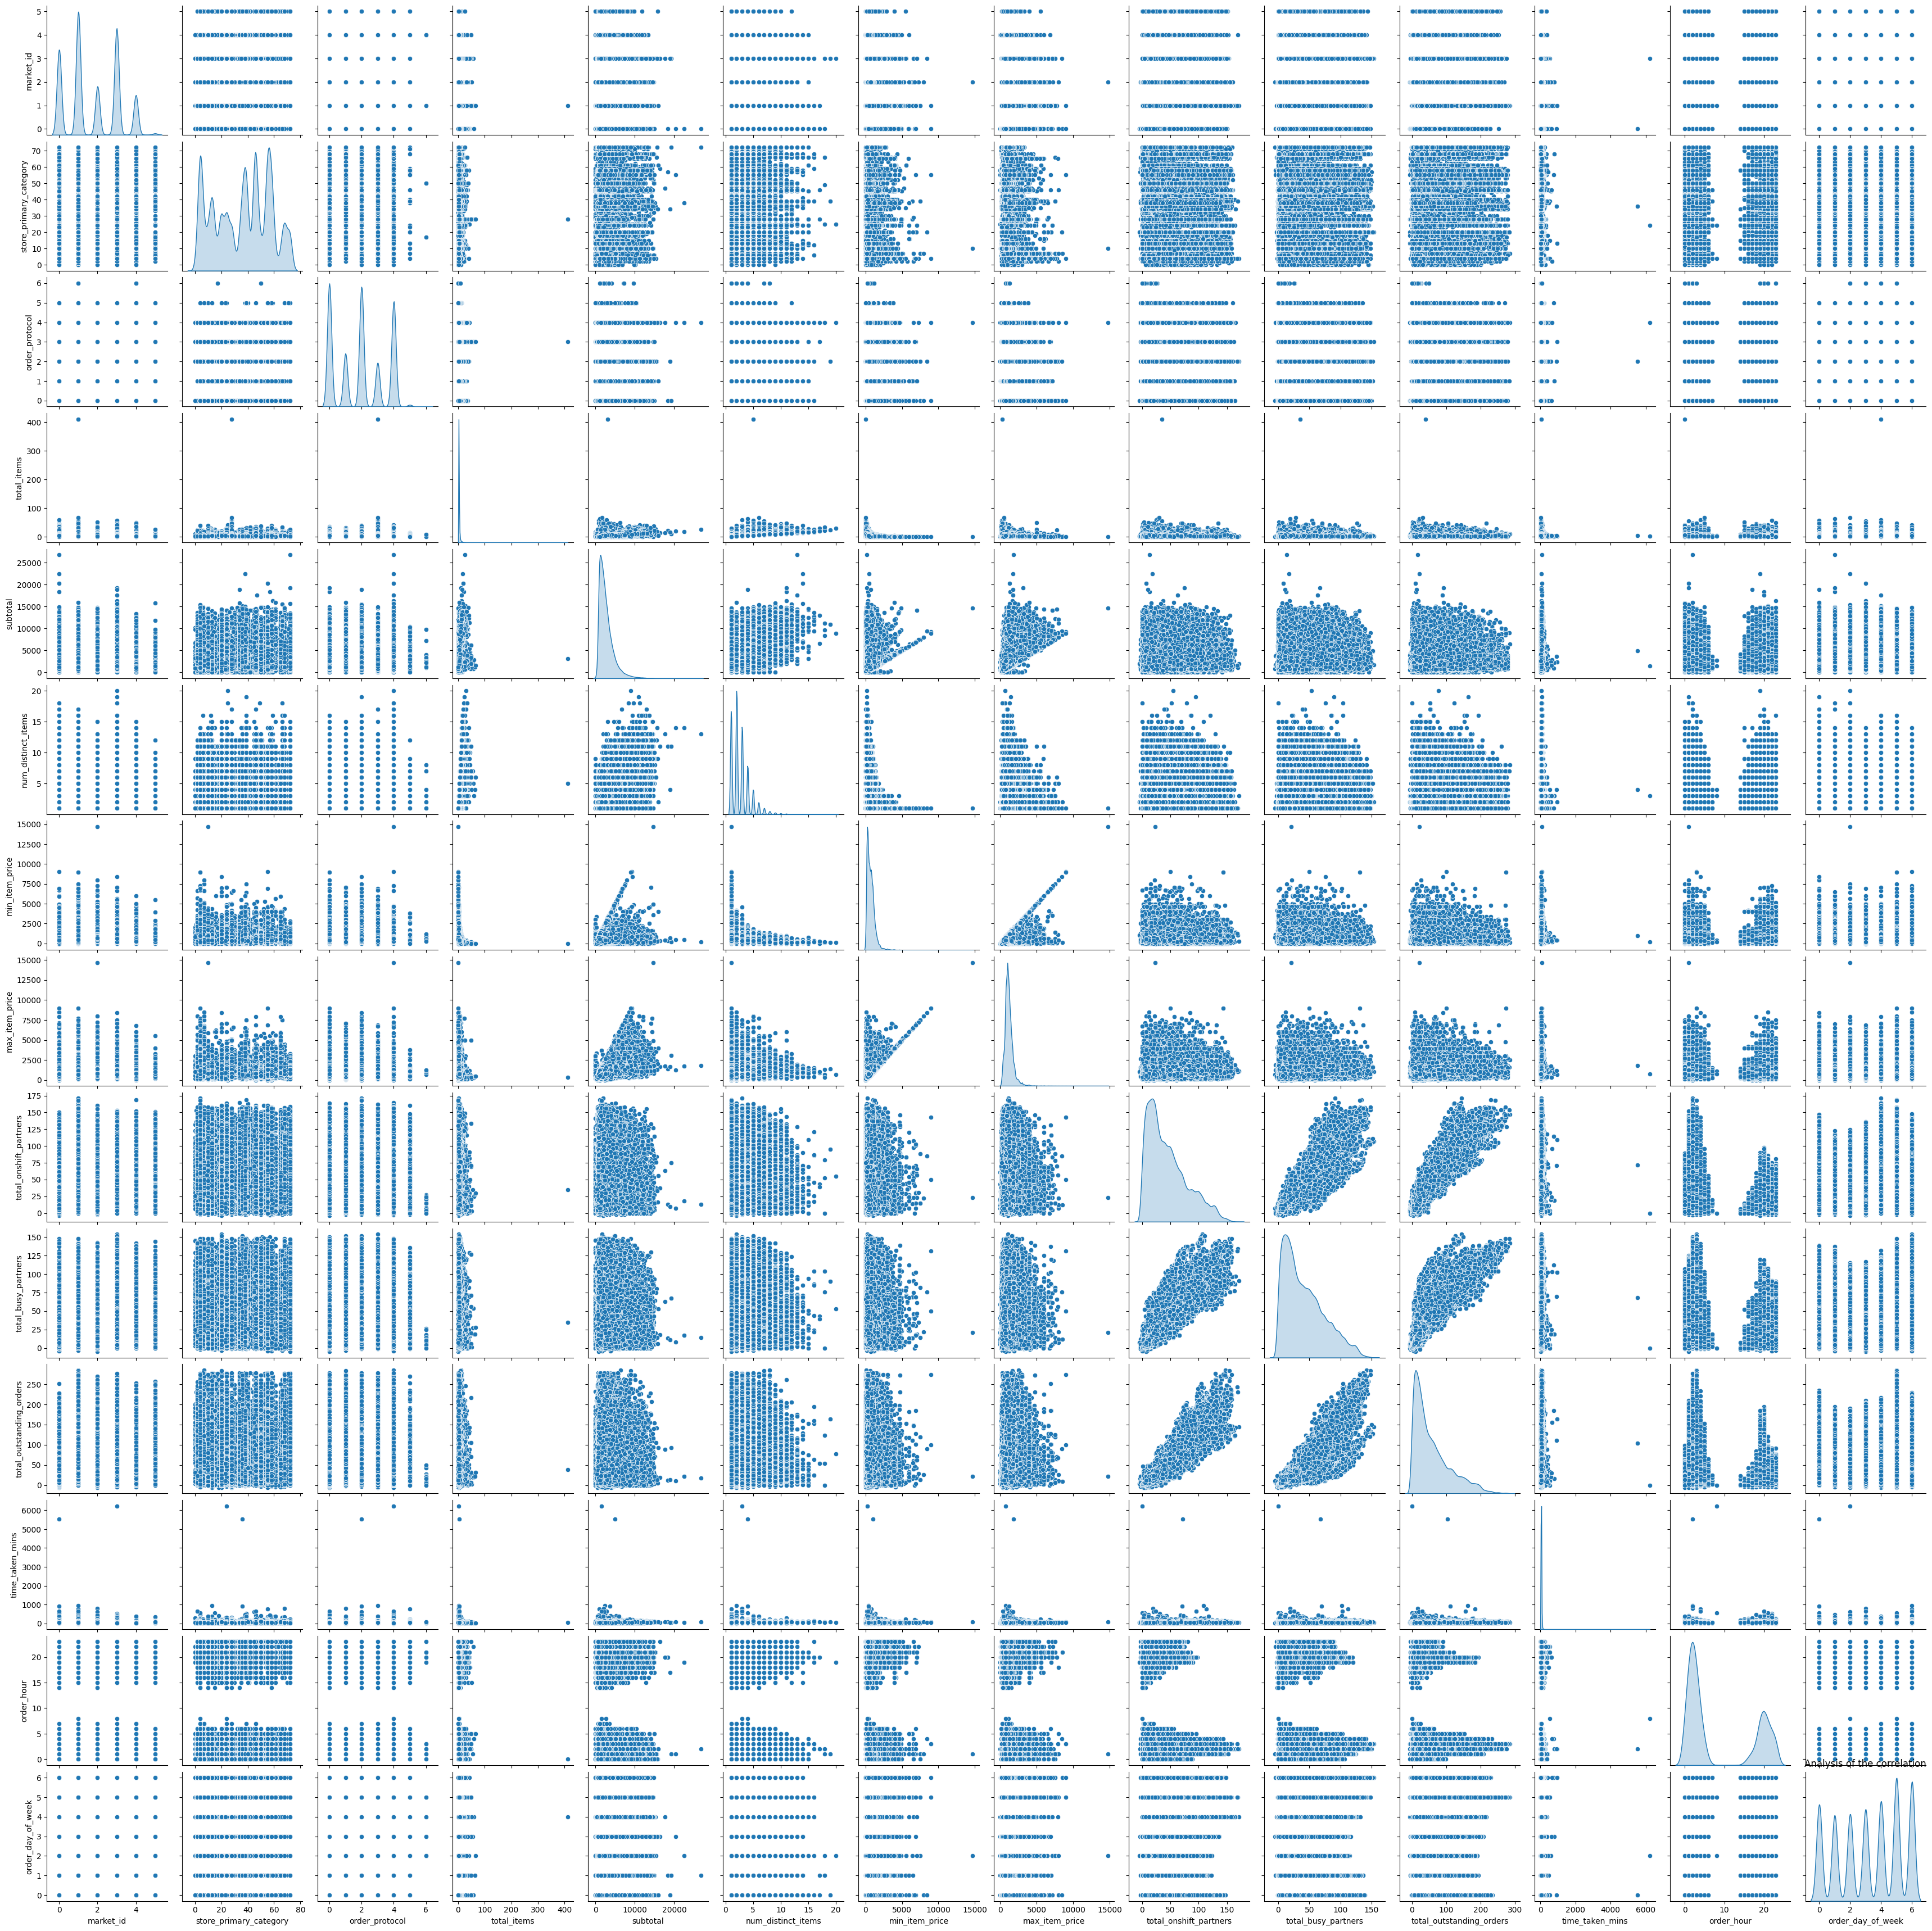

In [35]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, diag_kind="kde")
plt.title('Analysis of the correlation')
plt.show()

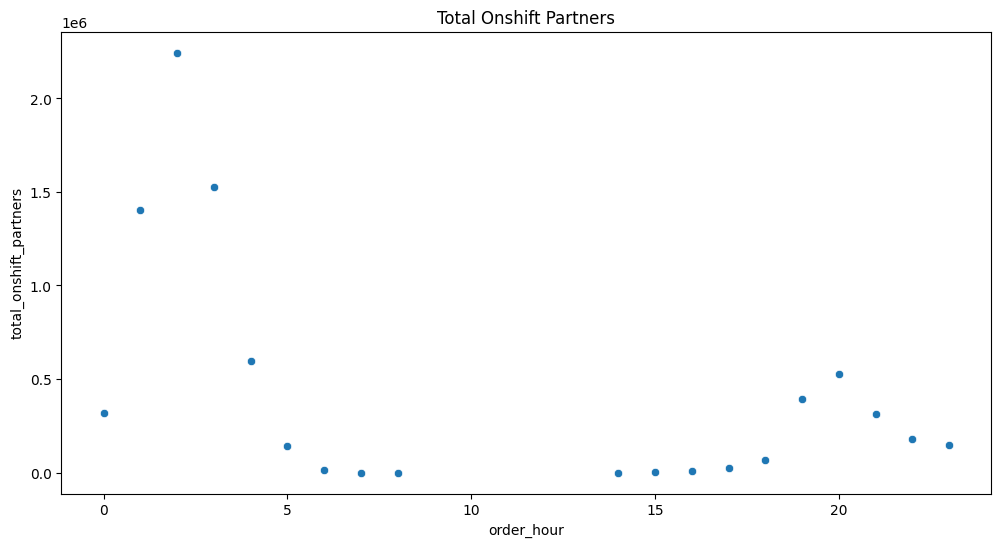

In [36]:
plt.figure(figsize=(12, 6))
plt.title("Total Onshift Partners")
groupdata = df.groupby("order_hour")["total_onshift_partners"].sum().to_frame()
groupdata.reset_index(inplace=True)
sns.scatterplot(data=groupdata, x="order_hour", y="total_onshift_partners")
# plt.plot(groupdata)
plt.show()

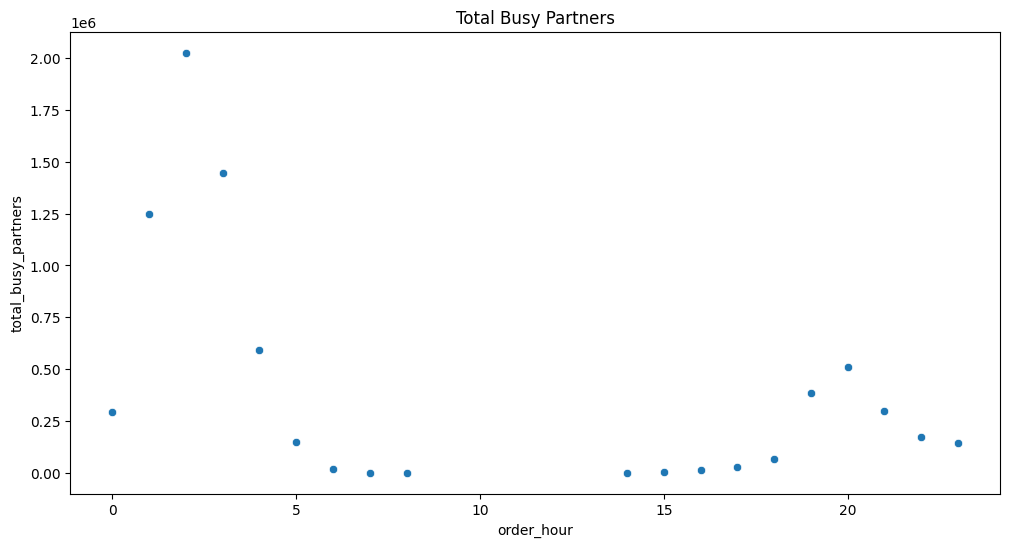

In [37]:
plt.figure(figsize=(12, 6))
plt.title("Total Busy Partners")
groupdata = df.groupby("order_hour")["total_busy_partners"].sum().to_frame()
groupdata.reset_index(inplace=True)
sns.scatterplot(data=groupdata, x="order_hour", y="total_busy_partners")
# plt.plot(groupdata)
plt.show()

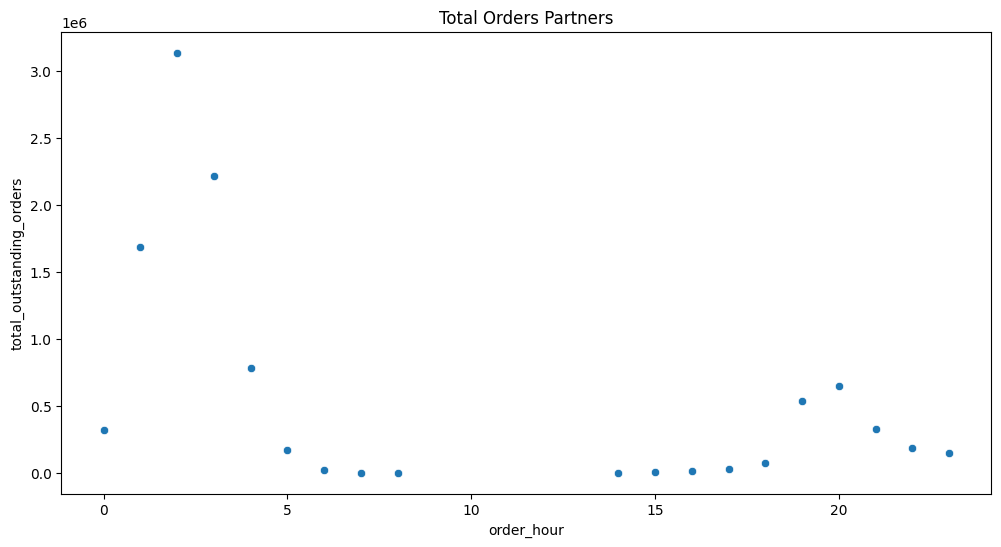

In [38]:
plt.figure(figsize=(12, 6))
plt.title("Total Orders Partners")
groupdata = df.groupby("order_hour")["total_outstanding_orders"].sum().to_frame()
groupdata.reset_index(inplace=True)
sns.scatterplot(data=groupdata, x="order_hour", y="total_outstanding_orders")
# plt.plot(groupdata)
plt.show()

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


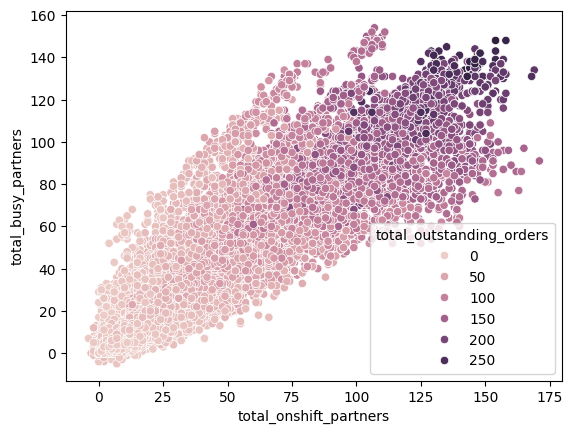

In [39]:
plt.figure(figsize=(12, 6))
plt.show("Multivariate analysis of the data")
sns.scatterplot(data=df, x="total_onshift_partners", y="total_busy_partners", hue="total_outstanding_orders")
plt.show()

<Figure size 1200x600 with 0 Axes>

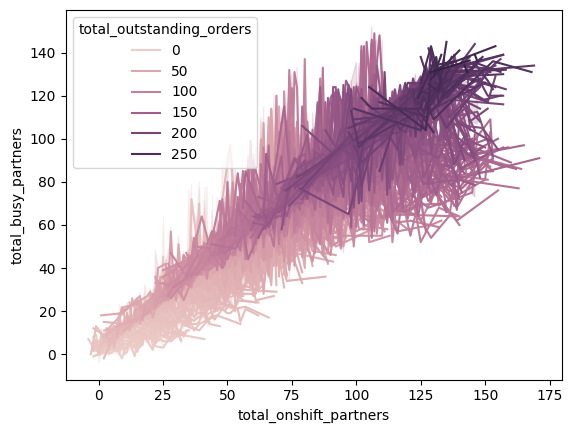

In [40]:
plt.figure(figsize=(12, 6))
plt.show("Multivariate analysis of the data")
sns.lineplot(data=df, x="total_onshift_partners", y="total_busy_partners", hue="total_outstanding_orders")
plt.show()

# Outlier Detection and Removal

In [41]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df)
df.lof_anomaly_score.value_counts()

lof_anomaly_score
 1    174312
-1      1936
Name: count, dtype: int64

In [42]:
df.drop(df[df['lof_anomaly_score']==-1].index,inplace=True)

In [43]:
df.shape

(174312, 15)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Train & Test Split

In [45]:
y = df["time_taken_mins"]
X = df.drop(["time_taken_mins"], axis = 1)

In [46]:
X.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'lof_anomaly_score'],
      dtype='object')

In [47]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(139449, 14)

In [49]:
x_test.shape

(34863, 14)

# Standard Scaling of features

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [51]:
def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse,
            "RMSE":rmse,
            "MAE":mae,
            "R2":r2}

## Using Classical model to get initial understanding of the dataset and underline pattern

1. Using Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor = RandomForestRegressor()
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [54]:
prediction = regressor.predict(X_test_scaled)

In [55]:
eval = metrics_evals(y_test, prediction)
eval

{'MSE': 227.16753405969746,
 'RMSE': 15.072077960908292,
 'MAE': 11.236171976316367,
 'R2': 0.27826988868010705}

In [56]:
def metrics_evals(y_true, y_pred):
    """
    Calculates and returns a dictionary of regression metrics.

    Args:
        y_true: The true target values.
        y_pred: The predicted target values.

    Returns:
        A dictionary containing the calculated metrics:
            - MSE: Mean Squared Error
            - RMSE: Root Mean Squared Error
            - MAE: Mean Absolute Error
            - R2: R-squared (coefficient of determination)
    """
    mse = mean_squared_error(y_true, y_pred)
    # Calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2}

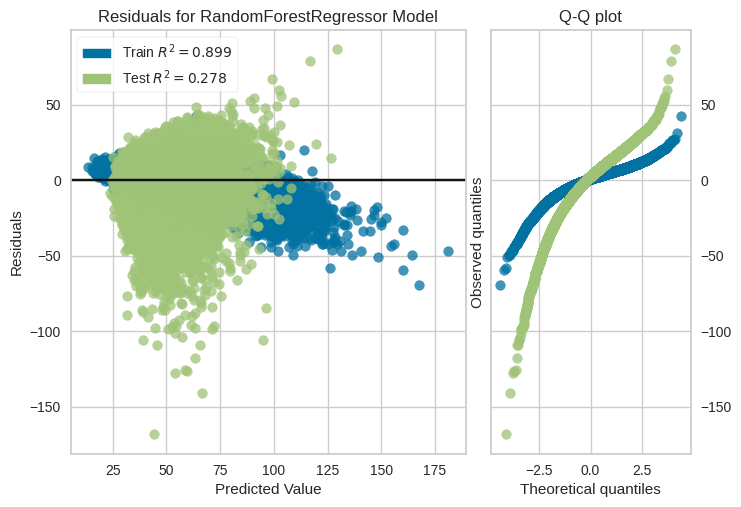

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

# Insight
- It is clear evident from the visualtion that it is not fitting the regression line.
- Model is overfitting
- We can try to introduce the regularizer.

# Let's try XGBoostRegressor

In [58]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators = 300,
                   n_jobs = -1,
                   random_state = 123)

xgb.fit(X_train_scaled, y_train, eval_set = [(X_test_scaled, y_test)], verbose=True)

[0]	validation_0-rmse:17.00744
[1]	validation_0-rmse:16.57070
[2]	validation_0-rmse:16.21982
[3]	validation_0-rmse:16.01951
[4]	validation_0-rmse:15.88715
[5]	validation_0-rmse:15.76019
[6]	validation_0-rmse:15.59783
[7]	validation_0-rmse:15.52408
[8]	validation_0-rmse:15.45382
[9]	validation_0-rmse:15.39742
[10]	validation_0-rmse:15.35545
[11]	validation_0-rmse:15.28972
[12]	validation_0-rmse:15.23224
[13]	validation_0-rmse:15.20058
[14]	validation_0-rmse:15.15008
[15]	validation_0-rmse:15.11251
[16]	validation_0-rmse:15.07938
[17]	validation_0-rmse:15.06744
[18]	validation_0-rmse:15.04246
[19]	validation_0-rmse:15.01950
[20]	validation_0-rmse:15.01212
[21]	validation_0-rmse:14.98965
[22]	validation_0-rmse:14.98160
[23]	validation_0-rmse:14.97268
[24]	validation_0-rmse:14.96290
[25]	validation_0-rmse:14.94472
[26]	validation_0-rmse:14.93571
[27]	validation_0-rmse:14.92581
[28]	validation_0-rmse:14.92060
[29]	validation_0-rmse:14.91633
[30]	validation_0-rmse:14.91000
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [59]:
!pip install scikit-learn==1.0.2

In [60]:
!pip install --upgrade yellowbrick

In [61]:
!pip install --upgrade xgboost

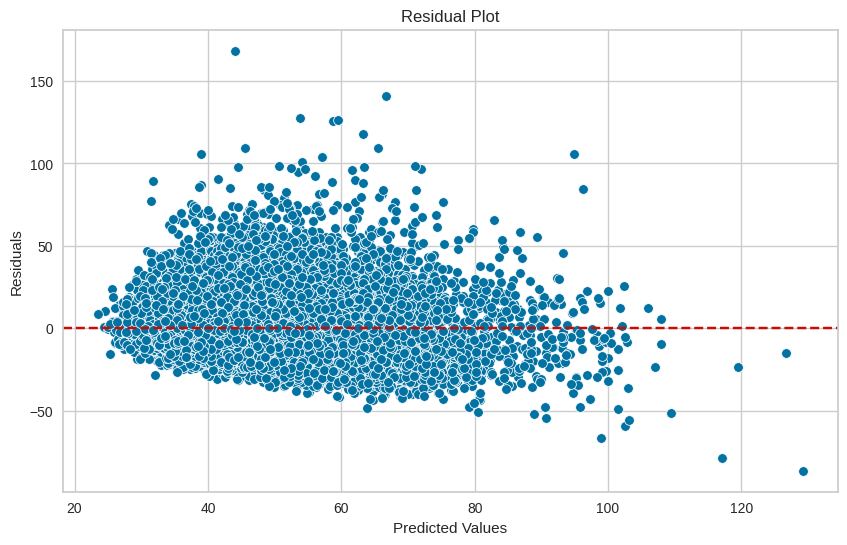

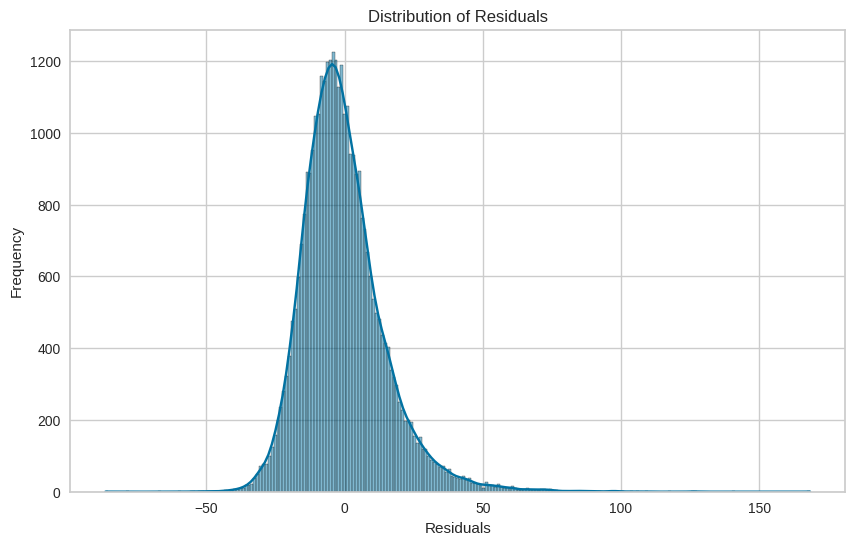

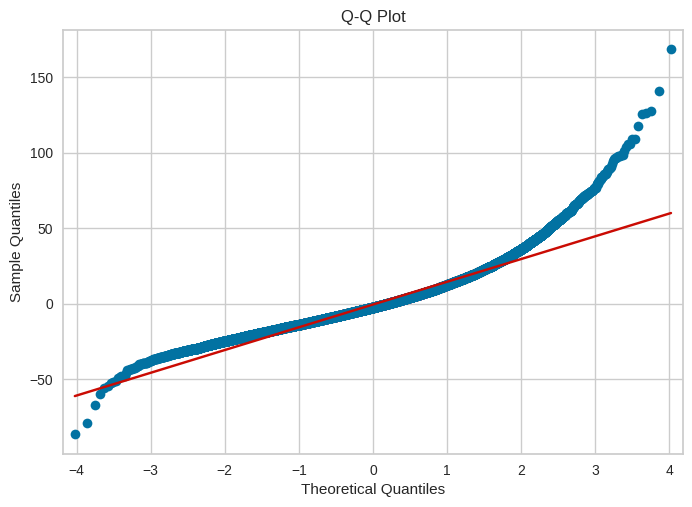

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your predictions in 'prediction' and true values in 'y_test'

residuals = y_test - prediction

plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# You can also use statsmodels for Q-Q plot:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

[0]	validation_0-rmse:17.00744
[1]	validation_0-rmse:16.57070
[2]	validation_0-rmse:16.21982
[3]	validation_0-rmse:16.01951
[4]	validation_0-rmse:15.88715
[5]	validation_0-rmse:15.76019
[6]	validation_0-rmse:15.59783
[7]	validation_0-rmse:15.52408
[8]	validation_0-rmse:15.45382
[9]	validation_0-rmse:15.39742
[10]	validation_0-rmse:15.35545
[11]	validation_0-rmse:15.28972
[12]	validation_0-rmse:15.23224
[13]	validation_0-rmse:15.20058
[14]	validation_0-rmse:15.15008
[15]	validation_0-rmse:15.11251
[16]	validation_0-rmse:15.07938
[17]	validation_0-rmse:15.06744
[18]	validation_0-rmse:15.04246
[19]	validation_0-rmse:15.01950
[20]	validation_0-rmse:15.01212
[21]	validation_0-rmse:14.98965
[22]	validation_0-rmse:14.98160
[23]	validation_0-rmse:14.97268
[24]	validation_0-rmse:14.96290
[25]	validation_0-rmse:14.94472
[26]	validation_0-rmse:14.93571
[27]	validation_0-rmse:14.92581
[28]	validation_0-rmse:14.92060
[29]	validation_0-rmse:14.91633
[30]	validation_0-rmse:14.91000
[31]	validation_0-

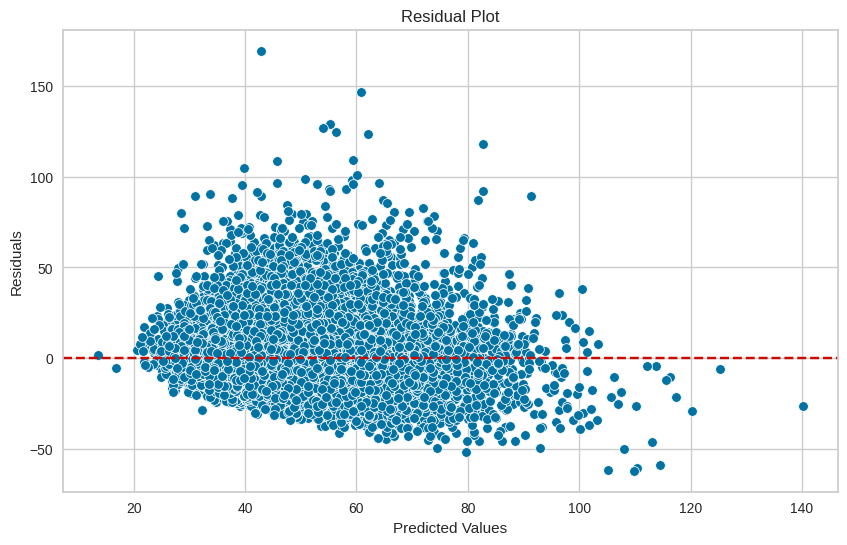

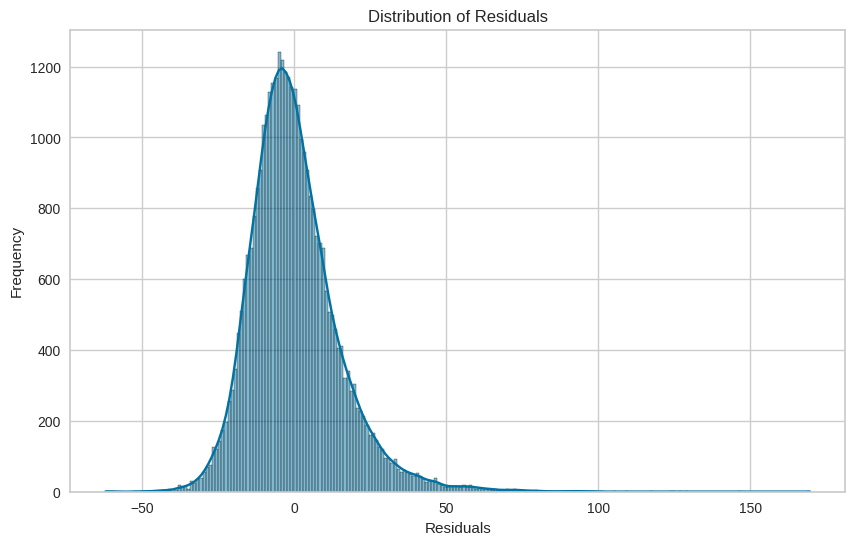

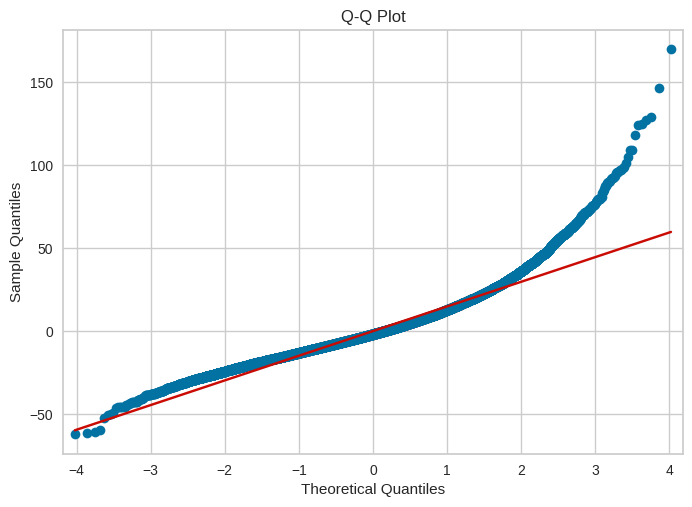

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler



# Assuming 'df' is your DataFrame containing the data

# Separate features (X) and target (y)
y = df["time_taken_mins"]
X = df.drop(["time_taken_mins"], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the XGBoost model
xgb = XGBRegressor(n_estimators=300, n_jobs=-1, random_state=123)
xgb.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=True)

# Get predictions
prediction = xgb.predict(X_test_scaled)

# Now calculate residuals
residuals = y_test - prediction

# Continue with your plotting code...
plt.figure(figsize=(10, 6))
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# You can also use statsmodels for Q-Q plot:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [64]:
prediction = xgb.predict(X_test_scaled)

In [65]:
print(metrics_evals(y_test, prediction))

{'MSE': 220.23519870240216, 'RMSE': 14.840323402891265, 'MAE': 10.970973223221266, 'R2': 0.3002944935156411}


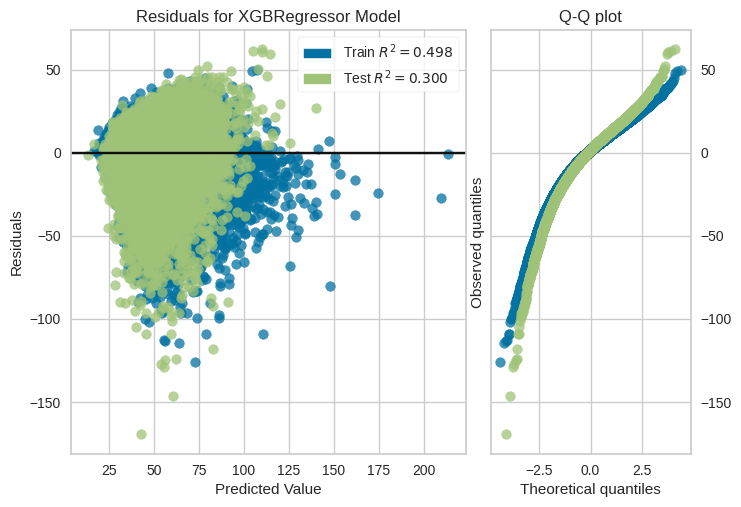

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
visualizer = ResidualsPlot(xgb, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

# Insights
- Without any regularization and engineering, we observe we have very good fitted line.
- It captures more information than Random Forest
- R2 Score of train ~0.5 and test ~0.3 indicates slightly overfitted model.

In [67]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Let's try state of the art RNA

In [68]:
!pip install keras
!pip install tensorflow
import tensorflow as tf
import keras
from keras.api.layers import Dense, Dropout, Input
from keras.api.models import Model
from keras import Sequential

# Architecting NN Model

In [69]:
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))

model.add(Dense(16, kernel_initializer="normal", activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

- Adding the Input Layer
- Added 3 hidden layers each using activation unit **RELU**
  - 512 Nodes, 256 Nodes & 32 Output
- As this is regression model, we would have single output node and we using **linear** activation function
- Using **ADAM** as optimizer
- For metrics we are looking for **MSE** and trying to minimize this loss function.

In [70]:
from keras.src.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
history=model.fit(X_train_scaled,y_train,epochs=100,batch_size=512,verbose=1, validation_split=0.2 ,callbacks=[create_model_checkpoint(model_name="model_1.keras")])

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 514.5037 - mae: 16.4758 - mse: 514.5037 - val_loss: 238.8293 - val_mae: 11.5873 - val_mse: 238.8293
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 254.9230 - mae: 11.9580 - mse: 254.9230 - val_loss: 238.1443 - val_mae: 11.7253 - val_mse: 238.1443
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - loss: 252.9812 - mae: 11.9218 - mse: 252.9812 - val_loss: 236.3173 - val_mae: 11.6778 - val_mse: 236.3173
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 254.1193 - mae: 11.9425 - mse: 254.1193 - val_loss: 234.4924 - val_mae: 11.5481 - val_mse: 234.4924
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 250.7421 - mae: 11.8606 - mse: 250.7421 - val_loss: 234.1084 - val_mae: 11.5776 - val_mse: 234.1084
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 250.1258 - mae: 11.8445 - mse: 250.1258 - val_loss: 237.8430 - val_mae: 11.8600 - val_mse: 237.8430
Epoch 7/100
218/218 ━━━━

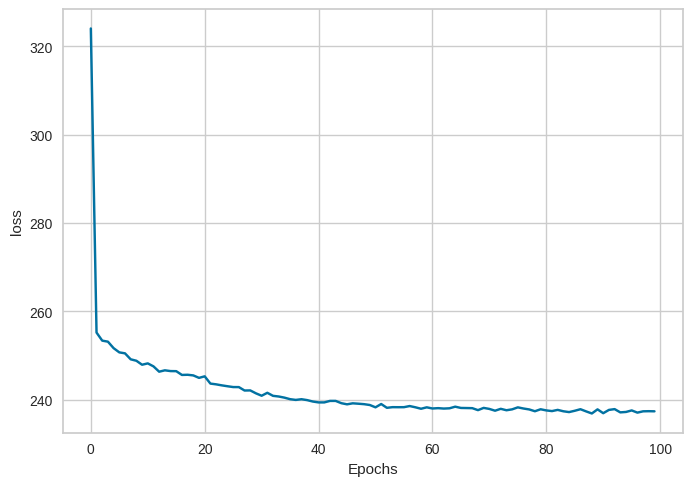

In [71]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.show()
#plot the history
plot_history(history,'loss')

In [72]:
prediction = model.predict(X_test_scaled)

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [73]:
eval = metrics_evals(y_test, prediction)
eval

{'MSE': 239.4830115102479,
 'RMSE': 15.475238657618432,
 'MAE': 11.596106302359667,
 'R2': 0.23914259459675613}

In [74]:
prediction_train = model.predict(X_train_scaled)

4358/4358 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step


In [75]:
evaluation = metrics_evals(y_train,prediction_train)
evaluation

{'MSE': 234.65462298361965,
 'RMSE': 15.318440618536197,
 'MAE': 11.521100007833477,
 'R2': 0.2457744598228867}

In [76]:
model.evaluate(X_test_scaled,y_test)

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 239.2265 - mae: 11.5759 - mse: 239.2265


[239.4829559326172, 239.4829559326172, 11.59610366821289]

- It is clear evident from the graph, as the number of epochs increases model tends to perform better

# let's try different architecture

In [77]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [78]:
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
history=model.fit(X_train_scaled,y_train,epochs=50,batch_size=512,verbose=1 ,callbacks=[create_model_checkpoint(model_name="model_2.keras")])

Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 450.9185 - mae: 15.4131 - mse: 450.9185
Epoch 2/50
  7/273 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 245.8014 - mae: 11.6979 - mse: 245.8014

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 264.7046 - mae: 12.1496 - mse: 264.7046
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 257.8663 - mae: 11.9814 - mse: 257.8663
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 254.4708 - mae: 11.9095 - mse: 254.4708
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 252.8540 - mae: 11.8487 - mse: 252.8540
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 250.2519 - mae: 11.7738 - mse: 250.2519
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 250.2518 - mae: 11.7937 - mse: 250.2518
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 249.5516 - mae: 11.7704 - mse: 249.5516
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 248.9884 - mae: 11.7549 - mse: 248.9884
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 246.2330 - mae: 11.6772 - mse: 246.2330
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 245.5151 - mae: 11.6646 - mse: 245.

- There is not much improvements seen.
- This is the best underlying model

# Leading Questions

    1. Defining the problem statements and where can this and modifications of this be used?
    - Delivery time estimation for the orders, we can use this case with some modification in the **Estimate Cab Arrival Time**.
    
    2. List 3 functions the pandas datetime provides with one line explanation.
    - pd.to_datetime(): Converts a date string or a numeric timestamp into a pandas Datetime object.

    - .dt accessor: Allows vectorized access to attributes like year, month, day, hour, etc., from a Datetime column in a pandas DataFrame.

    - pd.date_range(): Generates a sequence of Datetime objects at specified frequency, such as daily, monthly, or hourly intervals.

    3. Short note on datetime, timedelta, time span (period)
    - Datetime
        - A datetime represents a specific point in time, including both the date and the time of day.

    - Timedelta
        - A timedelta represents the difference between two datetime objects, typically expressed in days, seconds, and microseconds.

    - Time Span (Period)
        - A Period represents a time span or interval of time, such as a specific month, quarter, or year.

    4. Why do we need to check for outliers in our data?
    - Checking for outliers is a critical step in data preprocessing that helps ensure the reliability of statistical analysis, improves model performance, maintains data quality, and sometimes uncovers important insights.

    5. Name 3 outlier removal methods?
    - Z-Score Method
    - IQR Method
    - LOF Method
    
    6. What classical machine learning methods can we use for this problem?
    - Random Forest
    - XGBoost
    - Linear Regression

    7. Why is scaling required for neural networks?
    - Convergence Speed
    - Numerical Stability
    - Improving weight initialization
    
    8. Briefly explain your choice of optimizer.
    - We are using ADAM because of the following reason
      - Moment Estimation: Computes estimates of the first moment (mean) and second moment (uncentered variance) of the gradients.
      - Bias Correction: Applies bias correction to the moment estimates to counteract their initialization bias.
      - Parameter Update: Updates parameters using these corrected moment estimates, adjusted by learning rates.

    9. Which activation function did you use and why?
    - We are using RELU because of the following reasons:
      - Mitigating vanishing gradients
      - Sparse Activation
      - Avoid exploding gradients
    
    10. Why does a neural network perform well on a large dataset?
    - Neural networks perform well on large datasets because they provide diverse, representative, and sufficient data that helps in learning complex patterns, reducing overfitting, and improving generalization. The increased volume of data supports the training of more sophisticated models and enhances their ability to make accurate predictions.
